In [ ]:
# !pip install -U scikit-learn
!python -c "import sklearn; sklearn.show_versions()"

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from numpy.random import randint
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

%matplotlib inline

# Análise de Modelo

Foi realizado um teste com base em características de pacientes, existe uma possibilidade de desenvolver (D) ou não (S) determinada doença: 

In [2]:
y_true = pd.Series(['D','D','D','D','D','D','S','S','S','S','S','S','S'])
y_pred = pd.Series(['D','D','S','D','D','D','D','S','D','S','S','D','S'])

Como saber que se o modelo de predição se comportou bem?

## Matrizes de Confusão

É uma tabela que mostra as frequencias de classificação para cada classe do modelo. Considerar as seguintes frequencias:

1. Verdadeiro Positivo (TP - true positive): no conjunto da classe real, o resultado foi correto. Por exemplo o paciente desenvolveu a doença e o modelo previu que iria desenvolver. (T & T)
2. Falso Positivo (FP - false positive): no conjunto da classe real, o resultado foi incorreto. Por exemplo o paciente desenvolveu a doença e o modelo previu que não iria desenvolver. (T & F - Erro tipo 2)
3. Falso Negativo (FN - false negative): no conjunto da classe real, o resultado foi incorreto. Por exemplo o paciente não desenvolveu a doença e o modelo previu que iria desenvolver. (F & T - Erro tipo 1)
4. Verdadeiro Negativo (TN - true negative): no conjunto da classe real, o resultado foi correto. Por exemplo o paciente não desenvolveu a doença e o modelo previu que não iria desenvolver. (F & F)

In [5]:
conf = confusion_matrix(y_true, y_pred)
print(conf)

[[5 1]
 [3 4]]


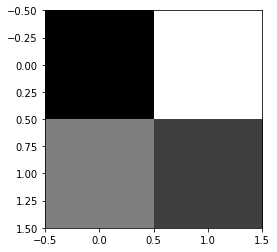

In [7]:
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

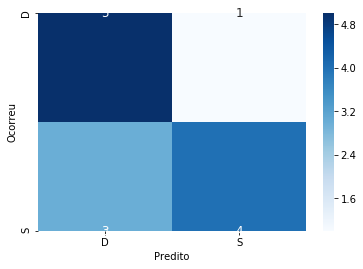

In [17]:
data = {
    'Ocorreu': ['D','D','D','D','D','D','S','S','S','S','S','S','S'],
    'Predito': ['D','D','S','D','D','D','D','S','D','S','S','D','S']
}
df = pd.DataFrame(data, columns=['Ocorreu','Predito'])
conf = pd.crosstab(df['Ocorreu'], df['Predito'], rownames=['Ocorreu'], colnames=['Predito'])
sn.heatmap(conf, annot=True, annot_kws={"size":12}, cmap=plt.cm.Blues)

## Com o uso de dados aleatórios

In [20]:
lookup = {0: 'Chocolate', 1:'Sorvete'}
y_true = pd.Series([lookup[_] for _ in randint(0, 2, size=100)])
y_pred = pd.Series([lookup[_] for _ in randint(0, 2, size=100)])

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum())

Predicted,Chocolate,Sorvete
True,,
Chocolate,60.377358,51.06383
Sorvete,39.622642,48.93617


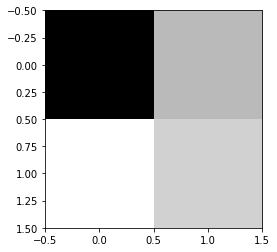

In [23]:
conf = confusion_matrix(y_true, y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

## Modelo KNN sobre a Íris

In [12]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9666666666666667


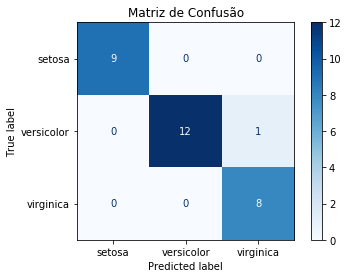

In [15]:
np.set_printoptions(precision=2)
disp = plot_confusion_matrix(clf, X_test, y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None)
disp.ax_.set_title("Matriz de Confusão")
plt.show()